In [4]:
from sklearn.datasets import load_sample_image
from matplotlib import pyplot as plt
import numpy as np
img= load_sample_image('china.jpg')

In [6]:
print(img.shape)

(427, 640, 3)


In [7]:
data= img/255.0
data= data.reshape(427*640,3)
print(data.shape)

(273280, 3)


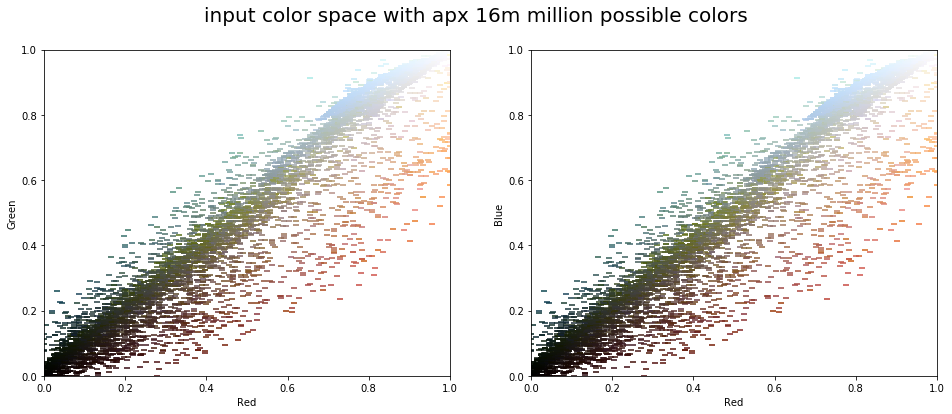

In [14]:
def plot_pixels(data,title,colors=None,N=10000):
    if colors is None:
        colors = data
    rng = np.random.RandomState(0)
    i= rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R,G,B=data[i].T
    fig,ax= plt.subplots(1,2,figsize=(16,6))
    ax[0].scatter(R,G ,color=colors,marker='_')
    ax[0].set(xlabel='Red',ylabel='Green',xlim=(0,1),ylim=(0,1))
    ax[1].scatter(R,G ,color=colors,marker='_')
    ax[1].set(xlabel='Red',ylabel='Blue',xlim=(0,1),ylim=(0,1))
    fig.suptitle(title,size=20)
plot_pixels(data,title='input color space with apx 16m million possible colors')
plt.show()
    

In [15]:
import warnings
warnings.simplefilter('ignore')

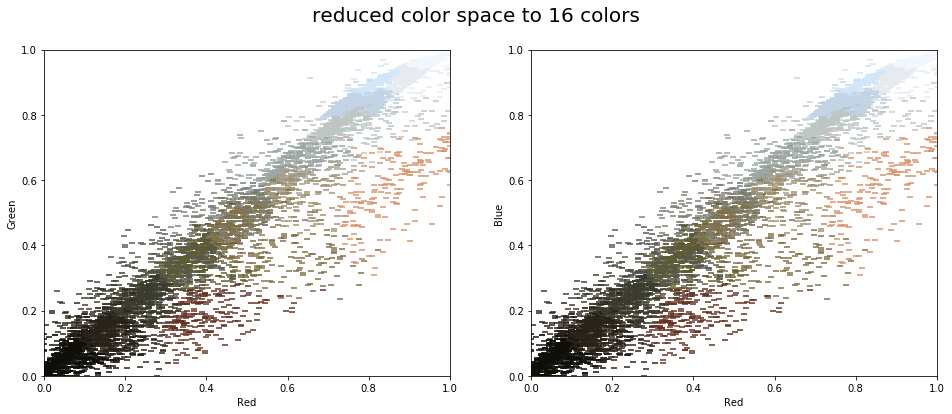

In [16]:
from sklearn.cluster import MiniBatchKMeans
model= MiniBatchKMeans(16)
model.fit(data)
new_color= model.cluster_centers_[model.predict(data)]
plot_pixels(data,colors= new_color, title='reduced color space to 16 colors')
plt.show()

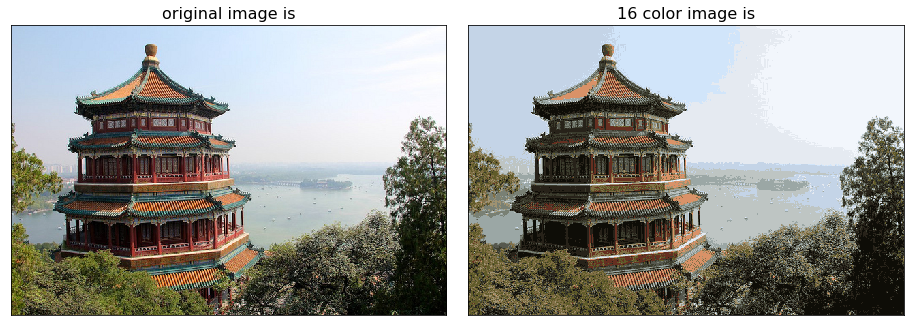

In [17]:
img_recolor= new_color.reshape(img.shape)
fig,ax = plt.subplots(1,2,figsize=(16,6),subplot_kw=dict(xticks=[],yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(img)
ax[0].set_title('original image is',size=16)
ax[1].imshow(img_recolor)
ax[1].set_title('16 color image is',size=16)
plt.show()